In [1]:
#載入所需函示庫

#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 60
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
def SI_MA(y_v, n):
    y_v_MA_a = np.zeros(len(y_v))
    y_v_MA_a[:] = np.nan
    mvlen = n
    if n % 2 == 0:
        halfwin = int(mvlen / 2)
        y_v_MA_ta = np.zeros(len(y_v))
        for i in range(halfwin, len(y_v) - halfwin + 1):
            y_v_MA_ta[i] = np.mean(y_v[(i-halfwin): (i+halfwin)])
        for ii in range(halfwin, len(y_v) - halfwin):
            y_v_MA_a[ii] = np.mean(y_v_MA_ta[(ii): (ii+2)])
    else:
        halfwin = int((mvlen - 1) / 2)
        for i in range(halfwin, len(y_v) - halfwin):
            y_v_MA_a[i] = np.mean(y_v[(i-halfwin): (i+halfwin+1)])
    SI_MA_a = np.zeros(len(y_v))
    SI_MA_a[:] = np.nan
    SI_MA_a = y_v / y_v_MA_a    
    SI_id_s = np.arange(1,len(y_v)+1)
    SI_id = SI_id_s - np.floor(SI_id_s / n) * n
    SI_id[np.where((SI_id[:] == 0))] = n
    SI_MA_a_df = pd.DataFrame({'SIMA': SI_MA_a, 'SIid': SI_id})
    SI_MA_u = np.zeros(n)
    for j in range(1,n+1):
        SI_MA_u[j-1] = SI_MA_a_df['SIMA'][SI_MA_a_df['SIid'] == j].dropna().mean()  
    SI_MA = SI_MA_u / sum(SI_MA_u) * n
    print('Seasonal Index:', SI_MA)  
    y_v_SI_MA = np.zeros(len(y_v))
    DSI_y_v = np.zeros(len(y_v))
    for k in range(0,len(y_v)):
        Idd = int(SI_MA_a_df['SIid'][k] - 1)
        y_v_SI_MA[k] = SI_MA[Idd]
        DSI_y_v[k] = y_v[k] / SI_MA[Idd]
    print('Deseasonalized Data:', DSI_y_v)
    SI_MA_result_a = np.array([SI_MA_a_df['SIid'], y_v_SI_MA, y_v, DSI_y_v])
    SI_MA_result_df = pd.DataFrame(SI_MA_result_a.T, columns = ['SID', 'SeaIdx', 'orig', 'Des_D'])
    return {"ma_ind":SI_MA, "SI_MA_res":SI_MA_result_df}

In [3]:
def SI_LR(y_v, n):
    y_data = y_v
    X_data_ar = np.arange(1, len(y_v)+1)
    X_data_T = X_data_ar.T
    X_data = pd.DataFrame(X_data_T,columns = ['Time'])
    X_data = sm.add_constant(X_data)
    olsmod = sm.OLS(y_data, X_data)
    result_reg = olsmod.fit()
    st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
    y_v_LR_a = data[:, 2]
    SI_LR_a = y_v / y_v_LR_a
    SI_id_s = np.arange(1,len(y_v)+1)
    SI_id = SI_id_s - np.floor(SI_id_s / n) * n
    SI_id[np.where((SI_id[:] == 0))] = n
    SI_LR_a_df = pd.DataFrame({'SILR': SI_LR_a, 'SIid': SI_id})
    SI_LR_u = np.zeros(n)
    for j in range(1,n+1):
        SI_LR_u[j-1] = SI_LR_a_df['SILR'][SI_LR_a_df['SIid'] == j].dropna().mean()
    SI_LR = SI_LR_u / sum(SI_LR_u) * n
    print('Seasonal Index:', SI_LR)
    print('\n')
    y_v_SI_LR = np.zeros(len(y_v))
    DSI_y_v = np.zeros(len(y_v))
    for k in range(0,len(y_v)):
        Idd = int(SI_LR_a_df['SIid'][k] - 1)
        y_v_SI_LR[k] = SI_LR[Idd]
        DSI_y_v[k] = y_v[k] / SI_LR[Idd]
    print('Deseasonalized Data:', DSI_y_v)
    SI_LR_result_a = np.array([SI_LR_a_df['SIid'], y_v_SI_LR, y_v, DSI_y_v])
    SI_LR_result_df = pd.DataFrame(SI_LR_result_a.T, columns = ['SID', 'SeaIdx', 'orig', 'Des_D'])
    return {"LR_ind":SI_LR, "SI_LR_res":SI_LR_result_df}

In [4]:
def ErrMetrix(y_v, f_v):
    y_v_n = pd.DataFrame({'orig': y_v})
    f_v_n = pd.DataFrame({'forecast': f_v})
    err1 = (y_v_n['orig'] - f_v_n['forecast']).dropna().values
    err1p = ((y_v_n['orig'] - f_v_n['forecast'])/ y_v_n['orig']).dropna().values
    MAD = round(np.absolute(err1).mean(),6)
    MSE = round(np.mean(err1 * err1),6)
    RMSE = round(np.sqrt(np.mean(err1 * err1)),6)
    MAPE = round(np.absolute(err1p).mean() * 100, 6)
    print("MAD = ", MAD)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAPE = ", MAPE, "%")
    return MAD, MSE, RMSE, MAPE

In [5]:
df = pd.read_excel('Xr20-15.xlsx')
print('Head of dataset:')
display(df.head())
print("Tail of dataset:")
display(df.tail())

Head of dataset:


,Year,Quarter,Sales
0,2013,1,18
1,2013,2,22
2,2013,3,27
3,2013,4,31
4,2014,1,33


Tail of dataset:


,Year,Quarter,Sales
11,2015,4,29
12,2016,1,41
13,2016,2,33
14,2016,3,52
15,2016,4,45


In [6]:
#調整期數從0開始
df["t"] = df.index
print('Head of dataset:')
display(df.head())
print("Tail of dataset:")
display(df.tail())

Head of dataset:


,Year,Quarter,Sales,t
0,2013,1,18,0
1,2013,2,22,1
2,2013,3,27,2
3,2013,4,31,3
4,2014,1,33,4


Tail of dataset:


,Year,Quarter,Sales,t
11,2015,4,29,11
12,2016,1,41,12
13,2016,2,33,13
14,2016,3,52,14
15,2016,4,45,15


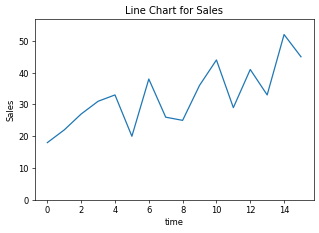

In [7]:
#確認season內的期數與data相符
plt.plot(df['t'], df['Sales'])
plt.ylim(0, max(df['Sales'])+5)
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Line Chart for Sales')
plt.show()

According to the plot above, we can check that there are 4 periods in one season.

# CMV

Seasonal Index: [1.00415522 0.85879739 1.2075961  0.92945129]
Deseasonalized Data: [17.92551558 25.61721815 22.358469   33.35301181 32.86344523 23.28838014
 31.4674749  27.97349378 24.89654942 41.91908424 36.43602356 31.2012046
 40.83034105 38.42582722 43.06075512 48.4156623 ]
                            OLS Regression Results                            
Dep. Variable:                  Des_D   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     29.86
Date:                Wed, 25 May 2022   Prob (F-statistic):           8.34e-05
Time:                        04:11:03   Log-Likelihood:                -47.434
No. Observations:                  16   AIC:                             98.87
Df Residuals:                      14   BIC:                             100.4
Df Model:                           1                                         
Covariance 

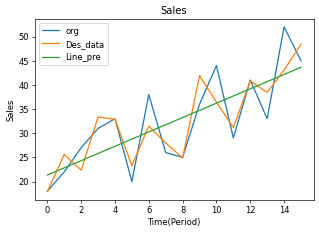

In [8]:
#Seasonal index 與 deseasonalizing
df_SIMA = pd.DataFrame(columns=["ma_ind", "SI_MA_res"])
df_SIMA = SI_MA(df['Sales'], 4)

#SI
df_MA_Idx = df_SIMA["ma_ind"]
#各期Quarter, SI, ori, des
df_MA_Result = df_SIMA["SI_MA_res"]

#利用Des和Period(t)跑regression
y_data_df_MA = df_MA_Result['Des_D']
X_data_ar_df = np.array(df['t'])
X_data_ar_df_T = X_data_ar_df.T
X_data_df = pd.DataFrame(X_data_ar_df_T, columns = ['t'])
X_data_df = sm.add_constant(X_data_df)
olsmod_df_MA = sm.OLS(y_data_df_MA, X_data_df)
result_reg_df_MA = olsmod_df_MA.fit()
print(result_reg_df_MA.summary())

#linear regression之於各期的結果（desensonalized）
df_MA_st_2, df_MA_data_2, df_MA_ss2_2 = sso.summary_table(result_reg_df_MA, alpha=0.05)
df_MA_y_pre_2 = df_MA_data_2[:, 2]
des_pre_df_MA = df_MA_y_pre_2
#print(des_pre_df4_MA)

plt.plot(df['t'], df_MA_Result['orig'])
plt.plot(df['t'], df_MA_Result['Des_D'])
plt.plot(df['t'], des_pre_df_MA)
plt.legend(labels=['org', 'Des_data', 'Line_pre'])
plt.xlabel('Time(Period)')
plt.ylabel('Sales')
plt.title('Sales')
plt.show()

New Des Prediction [45.13372227 46.61980389 48.10588551 49.59196713]
New Seasonal Prediction [45.32126271 40.03696575 58.09247979 46.09331804]


,time,org,Des_data,Line_pre,Seasonal Pre
0,0.0,18.0,17.925516,21.356416,21.445157
1,1.0,22.0,25.617218,22.842498,19.617078
2,2.0,27.0,22.358469,24.328580,29.379098
3,3.0,31.0,33.353012,25.814661,23.993470
4,4.0,33.0,32.863445,27.300743,27.414183
5,5.0,20.0,23.288380,28.786824,24.722050
6,6.0,38.0,31.467475,30.272906,36.557443
7,7.0,26.0,27.973494,31.758988,29.518432
8,8.0,25.0,24.896549,33.245069,33.383210
9,9.0,36.0,41.919084,34.731151,29.827022


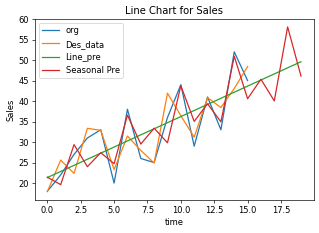

In [9]:
#predict for the next year
Sea_pre_df_MA = des_pre_df_MA * df_MA_Result['SeaIdx']
New_t_2 = np.arange(16, 20, 1)
Total_t_2 = np.append(df['t'], New_t_2)
New_t_2 = sm.add_constant(New_t_2)
df_MA_des_pre_New_t_2 = result_reg_df_MA.predict(New_t_2)
print('New Des Prediction', df_MA_des_pre_New_t_2)
df_MA_Sea_pre_New_t_2 = df_MA_des_pre_New_t_2 * df_MA_Idx
print('New Seasonal Prediction', df_MA_Sea_pre_New_t_2)
New_Nan = np.zeros(New_t_2.shape[0])
New_Nan[:] = np.nan


df_MA_New_orig_2 = np.append(df_MA_Result['orig'], New_Nan)
df_MA_New_Des_D_2 = np.append(df_MA_Result['Des_D'], New_Nan)
df_MA_New_des_pre_2 = np.append(des_pre_df_MA, df_MA_des_pre_New_t_2)
df_MA_New_Sea_pre_2 = np.append(Sea_pre_df_MA, df_MA_Sea_pre_New_t_2)
df_MA_S_a = np.array([Total_t_2, df_MA_New_orig_2, df_MA_New_Des_D_2, df_MA_New_des_pre_2, df_MA_New_Sea_pre_2])
df_MA_S_df = pd.DataFrame(df_MA_S_a.T, columns=['time', 'org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
display(df_MA_S_df)

plt.plot(Total_t_2, df_MA_New_orig_2)
plt.plot(Total_t_2, df_MA_New_Des_D_2)
plt.plot(Total_t_2, df_MA_New_des_pre_2)
plt.plot(Total_t_2, df_MA_New_Sea_pre_2)
plt.legend(labels=['org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Line Chart for Sales')
plt.show()

### Prediction for the 4 quarters in 2017 are: [45.32126271 40.03696575 58.09247979 46.09331804]

# SLR

Seasonal Index: [0.96499553 0.87769799 1.2031015  0.95420497]


Deseasonalized Data: [18.65293607 25.06556948 22.44199673 32.48777878 34.19704946 22.78688135
 31.58503243 27.24781446 25.90685565 41.01638642 36.57214281 30.39179305
 42.48724327 37.59835422 43.22162332 47.15967887]
                            OLS Regression Results                            
Dep. Variable:                  Des_D   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     29.11
Date:                Wed, 25 May 2022   Prob (F-statistic):           9.44e-05
Time:                        04:11:03   Log-Likelihood:                -47.301
No. Observations:                  16   AIC:                             98.60
Df Residuals:                      14   BIC:                             100.1
Df Model:                           1                                         
Covarian

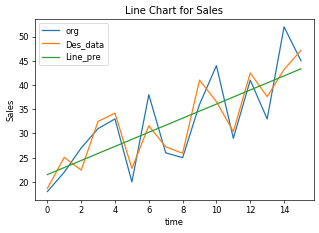

In [10]:
df_SILR = pd.DataFrame(columns=["LR_ind", "SI_LR_res"])
df_SILR = SI_LR(df['Sales'], 4)
df_LR_Idx = df_SILR["LR_ind"]
df_LR_Result = df_SILR["SI_LR_res"]
y_data_df_LR = df_LR_Result['Des_D']
X_data_ar_df = np.array(df['t'])
X_data_ar_df_T = X_data_ar_df.T
X_data_df = pd.DataFrame(X_data_ar_df_T, columns = ['t'])
X_data_df = sm.add_constant(X_data_df)
olsmod_df_LR = sm.OLS(y_data_df_LR, X_data_df)
result_reg_df_LR = olsmod_df_LR.fit()
print(result_reg_df_LR.summary())


df_LR_st_2, df_LR_st_data_2, df_LR_st_ss2_2 = sso.summary_table(result_reg_df_LR, alpha=0.05)
df_LR_st_y_pre_2 = df_LR_st_data_2[:, 2]
df_LR_st_SD_2 = df_LR_st_data_2[:, 10]
des_pre_df_LR = df_LR_st_y_pre_2


plt.plot(df['t'], df_LR_Result['orig'])
plt.plot(df['t'], df_LR_Result['Des_D'])
plt.plot(df['t'], des_pre_df_LR)
plt.legend(labels=['org', 'Des_data', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Line Chart for Sales')
plt.show()

New Des Prediction [44.79604065 46.25131649 47.70659233 49.16186817]
New Seasonal Prediction [43.22797916 40.59468761 57.39587296 46.91049898]


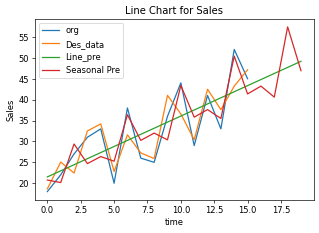

In [11]:
Sea_pre_df_LR = des_pre_df_LR * df_LR_Result['SeaIdx']
New_t_2 = np.arange(16, 20, 1)
Total_t_2 = np.append(df['t'], New_t_2)
New_t_2 = sm.add_constant(New_t_2)
df_LR_st_des_pre_New_t_2 = result_reg_df_LR.predict(New_t_2)
print('New Des Prediction', df_LR_st_des_pre_New_t_2)
df_LR_st_Sea_pre_New_t_2 = df_LR_st_des_pre_New_t_2 * df_LR_Idx
print('New Seasonal Prediction', df_LR_st_Sea_pre_New_t_2)
New_Nan = np.zeros(New_t_2.shape[0])
New_Nan[:] = np.nan

df_LR_st_New_orig_2 = np.append(df_LR_Result['orig'], New_Nan)
df_LR_st_New_Des_D_2 = np.append(df_LR_Result['Des_D'], New_Nan)
df_LR_st_New_des_pre_2 = np.append(des_pre_df_LR, df_LR_st_des_pre_New_t_2)
df_LR_st_New_Sea_pre_2 = np.append(Sea_pre_df_LR, df_LR_st_Sea_pre_New_t_2)
plt.plot(Total_t_2, df_LR_st_New_orig_2)
plt.plot(Total_t_2, df_LR_st_New_Des_D_2)
plt.plot(Total_t_2, df_LR_st_New_des_pre_2)
plt.plot(Total_t_2, df_LR_st_New_Sea_pre_2)
plt.legend(labels=['org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Line Chart for Sales')
plt.show()

### Prediction for the 4 quarters in 2017 are: [43.22797916 40.59468761 57.39587296 46.91049898]

# Dummy

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     8.782
Date:                Wed, 25 May 2022   Prob (F-statistic):            0.00195
Time:                        04:11:03   Log-Likelihood:                -47.031
No. Observations:                  16   AIC:                             104.1
Df Residuals:                      11   BIC:                             107.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4750      3.913      4.977      0.0

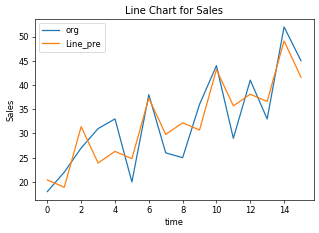

In [12]:
#轉換Quarter to Dummy variables
Quarter_dummy = pd.get_dummies(df['Quarter'], prefix = 'Quarter')
df_d = pd.concat([df, Quarter_dummy], axis = 1)
df_d.head()
y_data_df_d = df_d['Sales']
X_data_ar_df_d = np.array([df_d['t'], df_d['Quarter_1'], df_d['Quarter_2'], df_d['Quarter_3']])
X_data_ar_df_d_T = X_data_ar_df_d.T
X_data_df_d = pd.DataFrame(X_data_ar_df_d_T, columns = ['t', 'Quarter_1', 'Quarter_2', 'Quarter_3'])
X_data_df_d = sm.add_constant(X_data_df_d)

#regression
olsmod_df_d_DM = sm.OLS(y_data_df_d, X_data_df_d)
result_reg_df_d_DM = olsmod_df_d_DM.fit()
print(result_reg_df_d_DM.summary())
df_d_DM_st, df_d_DM_data, df_d_DM_ss2 = sso.summary_table(result_reg_df_d_DM, alpha=0.05)

#regression results
df_d_DM_y_pre = df_d_DM_data[:, 2]
df_d_DM_SD = df_d_DM_data[:, 10]
des_pre_df_d_DM = df_d_DM_y_pre
print(des_pre_df_d_DM)
plt.plot(df_d['t'], df_d['Sales'])
plt.plot(df_d['t'], des_pre_df_d_DM)
plt.legend(labels=['org', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Line Chart for Sales')
plt.show()

DM_pre: [44.  42.5 55.  47.5]


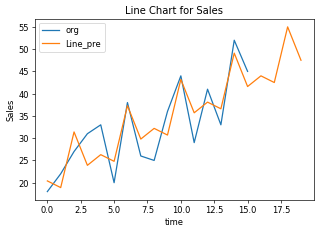

In [19]:
New_t_2 = np.array([[16, 1, 0, 0],
                    [17, 0, 1, 0],
                    [18, 0, 0, 1], 
                    [19, 0, 0, 0]])
Total_t_2 = np.append(df_d['t'], New_t_2[:,0])
New_t_2 = sm.add_constant(New_t_2)
df_d_DM_pre_New_t = result_reg_df_d_DM.predict(New_t_2)
print('DM_pre:', df_d_DM_pre_New_t)

New_Nan = np.zeros(New_t_2.shape[0])
New_Nan[:] = np.nan

df_d_DM_New_orig = np.append(df_d['Sales'], New_Nan)
df_d_DM_New_pre = np.append(des_pre_df_d_DM, df_d_DM_pre_New_t)
plt.plot(Total_t_2, df_d_DM_New_orig)
plt.plot(Total_t_2, df_d_DM_New_pre)
plt.legend(labels=['org', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Line Chart for Sales')
plt.show()

### Prediction for the 4 quarters in 2017 are: [44.  42.5 55.  47.5]

# Comparison

In [20]:
print('Error Metrics for Seasonal Index by Moving Average')
MA_Err_M = ErrMetrix(df['Sales'], Sea_pre_df_MA)
print('\n')
print('Error Metrics for Seasonal Index by LR')
LR_Err_M = ErrMetrix(df['Sales'], Sea_pre_df_LR)
print('\n')
print('Error Metrics for LR Dummy')
DM_Err_M = ErrMetrix(df['Sales'], des_pre_df_d_DM)

Error Metrics for Seasonal Index by Moving Average
MAD =  3.777726
MSE =  19.531313
RMSE =  4.419425
MAPE =  13.323721 %


Error Metrics for Seasonal Index by LR
MAD =  3.887417
MSE =  19.338802
RMSE =  4.39759
MAPE =  13.455253 %


Error Metrics for LR Dummy
MAD =  4.1125
MSE =  20.925
RMSE =  4.574385
MAPE =  14.18393 %


In [21]:
ErrM_id = ['MAD', 'MSE', 'RMSE', 'MAPE']
ErrM_a = np.array([ErrM_id, MA_Err_M, LR_Err_M, DM_Err_M])
ErrM_df = pd.DataFrame(ErrM_a.T, columns = ['ErrM', 'CMA', 'SLR', 'Dummy'])
display(ErrM_df)

,ErrM,CMA,SLR,Dummy
0,MAD,3.777726,3.887417,4.1125
1,MSE,19.531313,19.338802,20.925
2,RMSE,4.419425,4.39759,4.574385
3,MAPE,13.323721,13.455253,14.18393


#### According to the table above, we can see that CMA performs the best on MAD amd MAPE, while SLR performs the bext on MSE (RMSE).